<a href="https://colab.research.google.com/github/Suchitra-V31/OPENCV/blob/main/Opencv_beginner_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BASIC OPENCV PROJECTS**

**1.Edge Detection**

In [12]:
import cv2

In [13]:
from google.colab.patches import cv2_imshow

In [14]:
#load image
input=cv2.imread('/content/smile.jpg')

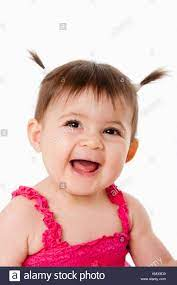

In [15]:
cv2_imshow(input)

In order to detect edges we need to convert this image to Grayscale..

In [16]:
imgGrey=cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)

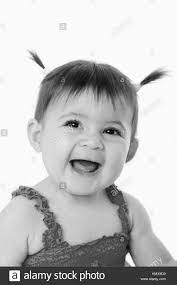

In [17]:
cv2_imshow(imgGrey)

Then we need to Blur the image inorder to reduce noise...

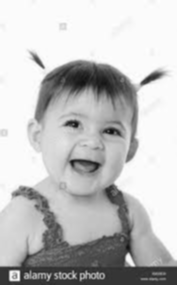

In [18]:
imgBlur=cv2.GaussianBlur(imgGrey,(3,3),0)
cv2_imshow(imgBlur)

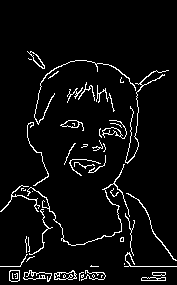

In [19]:
imgCanny=cv2.Canny(imgBlur,100,200)
cv2_imshow(imgCanny)

Finally,we detected the edges of the image...

**2.Pencil Sketch**

In order to sketch the image from the original image we need to make negative of the gray image..

In [20]:
img_grey_negative=255-imgGrey

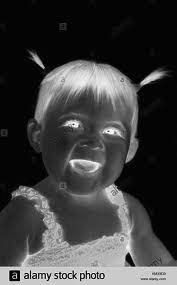

In [21]:
cv2_imshow(img_grey_negative)

In [22]:
img_blurr=cv2.GaussianBlur(img_grey_negative,(21,21),sigmaX=0,sigmaY=0)

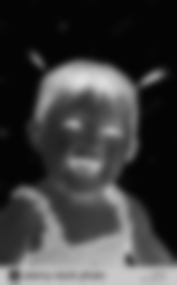

In [23]:
cv2_imshow(img_blurr)

**dodgeV2():** dividing the grayscale image by the inverse of the blurred image, remains with the highlights the boldest edges. This technique is commonly used by photographers to take print from the reel.

In [24]:
def dodge(x,y):
   return cv2.divide(x,255-y,scale=256)

In [25]:
pencil_sketch=dodge(imgGrey,img_blurr)

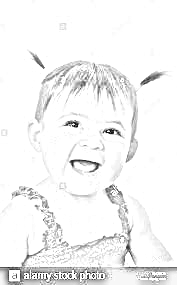

In [26]:
cv2_imshow(pencil_sketch)

In [27]:
rose=cv2.imread('/content/12240303_80d87f77a3_n.jpg')

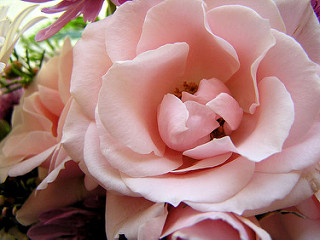

In [28]:
cv2_imshow(rose)

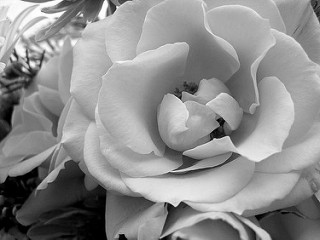

In [29]:
rose_grey=cv2.cvtColor(rose,cv2.COLOR_BGR2GRAY)
cv2_imshow(rose_grey)

In [30]:
rose_negative=255-rose_grey

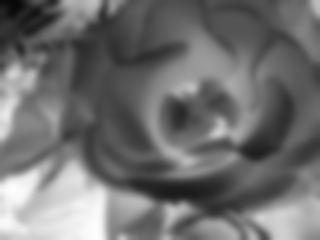

In [31]:
rose_blur=cv2.GaussianBlur(rose_negative,(21,21),sigmaX=0,sigmaY=0)
cv2_imshow(rose_blur)

In [32]:
rose_sketch=dodge(rose_grey,rose_blur)

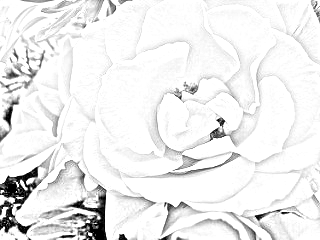

In [33]:
cv2_imshow(rose_sketch)

**3.Detecting Contours**


In [34]:
shapes=cv2.imread('/content/shapes.png')

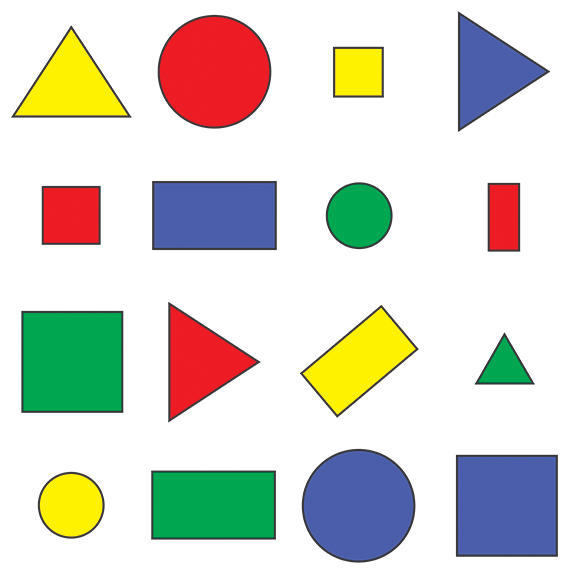

In [35]:
cv2_imshow(shapes)

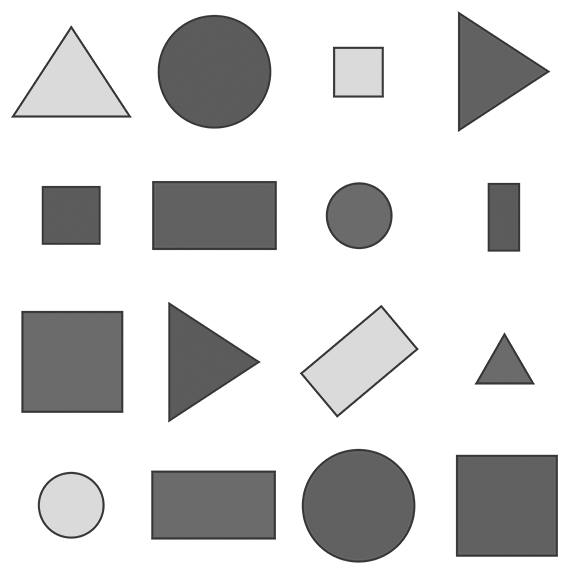

In [36]:
shapes_grey=cv2.cvtColor(shapes,cv2.COLOR_BGR2GRAY)
cv2_imshow(shapes_grey)

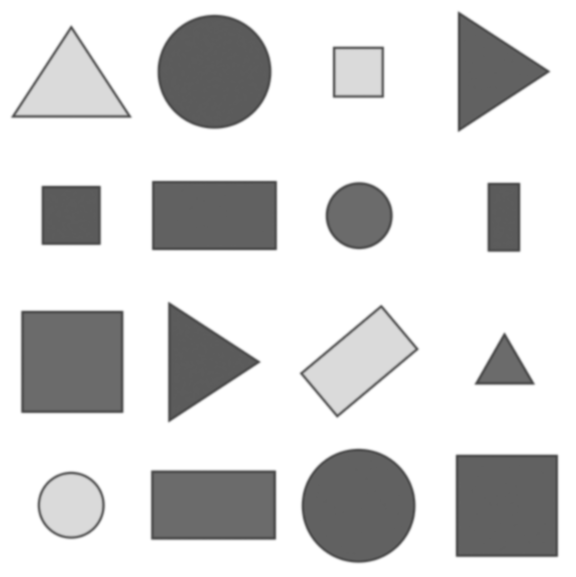

In [37]:
shapes_blur=cv2.GaussianBlur(shapes_grey,(7,7),1)
cv2_imshow(shapes_blur)

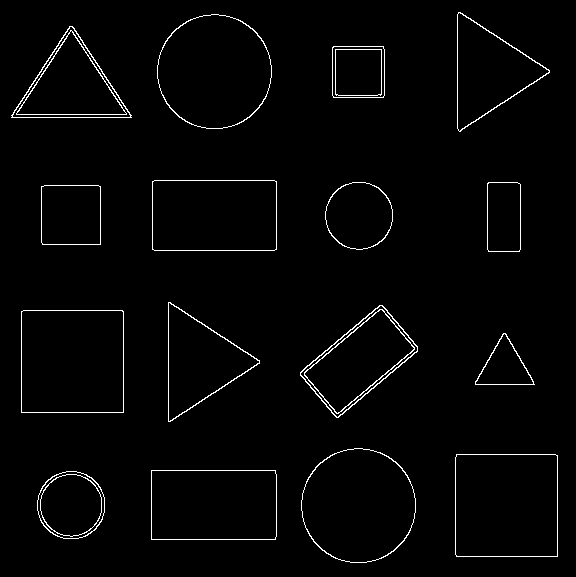

In [38]:
shapes_canny=cv2.Canny(shapes_blur,100,200)
cv2_imshow(shapes_canny)

In [39]:
imgContour=shapes.copy()

In [40]:
def getContours(shapes):
  contour,hierarchy=cv2.findContours(shapes,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  for c in contour:
    area=cv2.contourArea(c)
    if area>500:
      cv2.drawContours(imgContour,c,-1,(0,0,255),3)

In [41]:
getContours(shapes_canny)

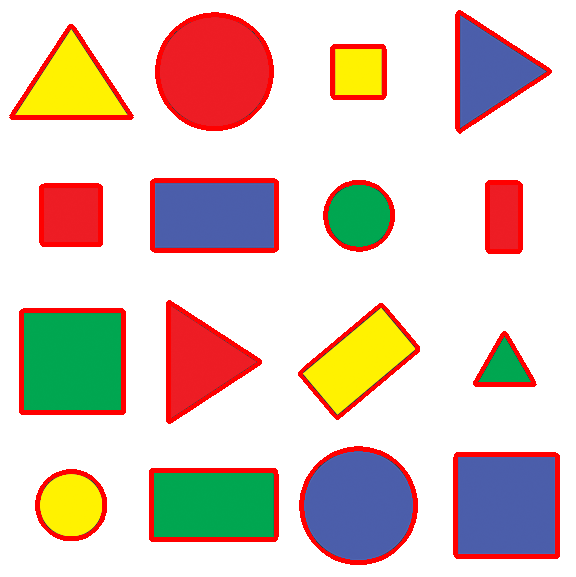

In [42]:
cv2_imshow(imgContour)